## PROJECT BY -        
### ▸ Saksham Yadav - 18csu187           
### ▸ Saloni Yadav - 18csu188

# DETECT FORGED BANKNOTES

### URL to the dataset
**https://drive.google.com/file/d/1_wQrgVfW7CM1HdNIIwLrdqat0Rt9P4OH/view?usp=sharing**

Everyday millions of people use banknotes to make transactions. The security of these banknotes for governments and banks is hence an essential factor to fight froud.

Nowadays, sometimes it is too hard to spot counterfeit and genuine notes. Then, the aim of this is to create a support system ready to help organizations to accurately classify fraudulent notes.

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels.

Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

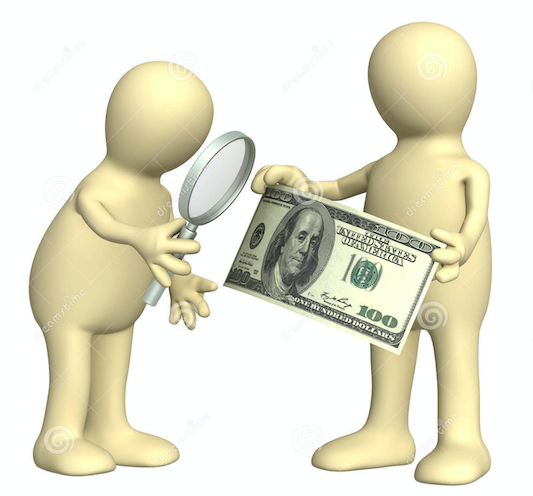

### About the Project 
This is a classification project, since the variable to be predicted is binary (fraudulent or legal).

The goal here is to model the probability that a banknote is fraudulent, as a function of its features.



### About the Dataset

The data file BankNote_authentication.csv is the source of information for the classification problem. The number of instances (rows) in the data set is 1372, and the number of variables (columns) is 5.

In that way, this problem has the following variables:

◆ Variance, used as input       
◆ Skewness, used as input        
◆ Curtosis, used as input          
◆ Entropy, used as input         
◆ Class, used as target. It can only have two values: 0 (false) or 1 (true).

The instances are divided into training and testing subsets. 

In [52]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Dataset import
data = pd.read_csv('Bank_Note_Authentication.csv')

In [54]:
# Outlook
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Seeing the Difference in the number of Forged and Authentic banknotes 

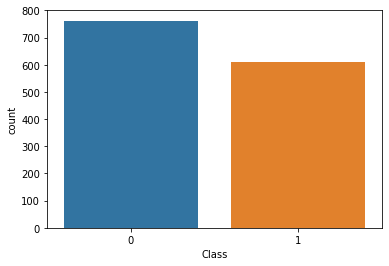

In [55]:
sns.countplot('Class',data=data)

Class 0 - Forged notes      
Class 1 - Authenticate notes      
As we can see, the number of authentic and forged banknotes are almost similar.

### The inputs-target correlations might indicate which factors better discriminate between authentic and false banknotes.

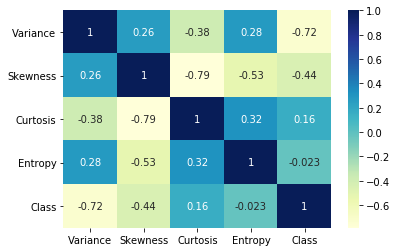

In [56]:
# Heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

From the above map, we can see that the Variance might be the most influential variable for this application.

### Checking for the missing values

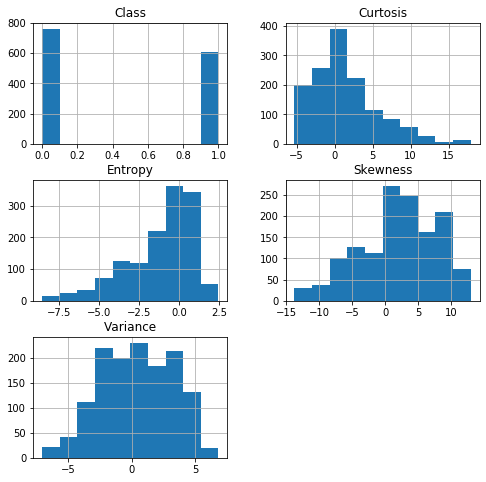

In [57]:
# Histogram plot
data.hist(figsize = (8,8))
plt.show()

No missing values, as we can see continuous histograms for each features used for predicting the output class.

### Splitting of the dataset for Training and Testing Instances

In [58]:
X = data.iloc[:, 0:4].values  
y = data.iloc[:, 4].values 

[Training dataset : Testing dataset ] - [ 70 : 30 ]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Feature Scaling 

Using Standardization ( z-score )

In [60]:
# fitting standard scaler in our dataset it makes mean=0 and standard deviation=1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

### Model Selection

▪️ RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestClassifier 

#### Training the model

In [62]:
rf_model = RandomForestClassifier(n_estimators=20, random_state=0) 
# fitting model on training dataset
rf_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Testing the model

In [63]:
# predicting values
y_pred = rf_model.predict(X_test) 

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

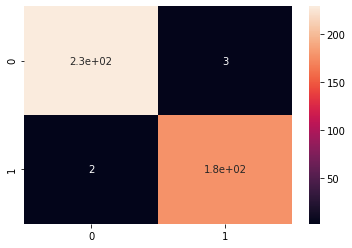

In [65]:
# Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives :",tn)
print("False Positives :",fp)
print("False Negatives :",fn)
print("True Positives :",tp)
print('\nCorrectly classified instances are :',tn+tp)
print('Incorrectly classified instances are :',fp+fn)

True Negatives : 229
False Positives : 3
False Negatives : 2
True Positives : 178

Correctly classified instances are : 407
Incorrectly classified instances are : 5


In [67]:
# calculating basic metrics
print('Classification Report :\n----------------------\n',classification_report(y_test,y_pred))  
rf_acc=metrics.accuracy_score(y_pred,y_test)
rf_pre=metrics.precision_score(y_pred,y_test)
rf_rec=metrics.recall_score(y_pred,y_test)
print('\nACCURACY SCORE :',rf_acc) 
print('PRECISION SCORE :',rf_pre)
print('RECALL SCORE :',rf_rec)

Classification Report :
----------------------
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412


ACCURACY SCORE : 0.9878640776699029
PRECISION SCORE : 0.9888888888888889
RECALL SCORE : 0.9834254143646409


Number of incorrectly classified instances are only 5 out of 412 which gives us the ACCURACY of about 98% with PRECISION of 98%, shows that this model performs amazingly during the testing phase.          
Thereby model is passed.

#### Testing Analysis

ROC curve shows the relationship between TPR and FPR.       
Area under the curve gives the measure of Accuracy of the model chosen.        
Area value of 1 indicates accuracy of 100% indicating that the model is good and value of 0 depicts that your model is not of any worth for the purpose.

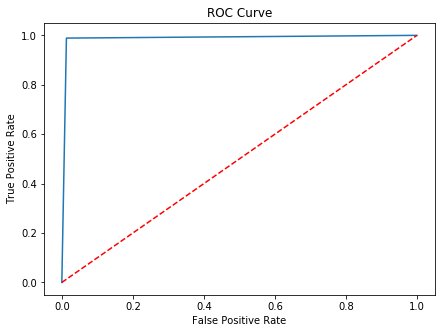

Area Under Curve 0.9879789272030651


In [68]:
# roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred) 
plt.figure(figsize=(7,5))
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# summarize score
print('Area Under Curve', roc_auc_score(y_test,y_pred))

The area under the curve of the model is very near to 1, which means that the classifier is predicting well all the testing instances.         
Therefore, the model is doing good work.

### Let's check another model

▪️ DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier

#### Training the model

In [70]:
clt = DecisionTreeClassifier()
clt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Testing the model

In [71]:
# making predictions
y_pred = clt.predict(X_test)

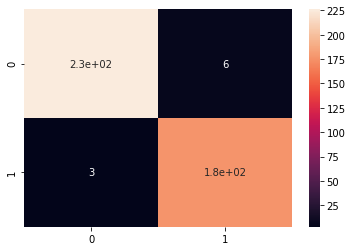

In [72]:
# Heatmap
out = confusion_matrix(y_test, y_pred)
sns.heatmap(out, annot=True)

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives :",tn)
print("False Positives :",fp)
print("False Negatives :",fn)
print("True Positives :",tp)
print('\nCorrectly classified instances are :',tn+tp)
print('Incorrectly classified instances are :',fp+fn)

True Negatives : 226
False Positives : 6
False Negatives : 3
True Positives : 177

Correctly classified instances are : 403
Incorrectly classified instances are : 9


In [74]:
# calculating basic metrics
print('Classification Report :\n----------------------\n',classification_report(y_test,y_pred))  
clt_acc=metrics.accuracy_score(y_pred,y_test)
clt_pre=metrics.precision_score(y_pred,y_test)
clt_rec=metrics.recall_score(y_pred,y_test)
print('\nACCURACY SCORE :',clt_acc) 
print('PRECISION SCORE :',clt_pre)
print('RECALL SCORE :',clt_rec)

Classification Report :
----------------------
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       232
           1       0.97      0.98      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412


ACCURACY SCORE : 0.9781553398058253
PRECISION SCORE : 0.9833333333333333
RECALL SCORE : 0.9672131147540983


Number of incorrectly classified instances are only 10 out of 412 which gives us the ACCURACY of about 97% with PRECISION of 98%, shows that this model performs well during the testing phase.       
Thereby this model is also passed.

#### Testing Analysis

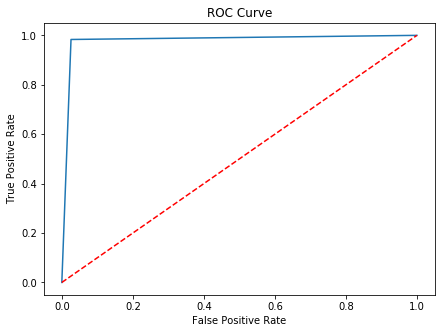

Area Under Curve 0.9787356321839081


In [75]:
# roc curve for the model
fpr, tpr, threshold = roc_curve(y_test, y_pred) 
plt.figure(figsize=(7,5))
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# summarize score
print('Area Under Curve', roc_auc_score(y_test,y_pred))

The area under the curve of the model is very near to 1, which means that the classifier is predicting well all the testing instances.         
Thereby indicating that this model is also doing good work.

##### IF WE COMPARE BOTH THE MODELS BUILT, WE SEE RANDOM FOREST DOMINATES OVER DECISION TREE

## CONCLUSION

#### Now, we see that both the models we built are amazing as the accuracy of Random Forest is 98% and that of Decision Tree is 97% both with the precision of 98%.                   
#### So, which one should I go with is clearly scene in the results i.e. RANDOM FOREST

#### There is one more advantage of using Random Forest over Decision tree i.e. Decision trees are prone to overfitting and Random forest aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.



# THANK YOU !!!